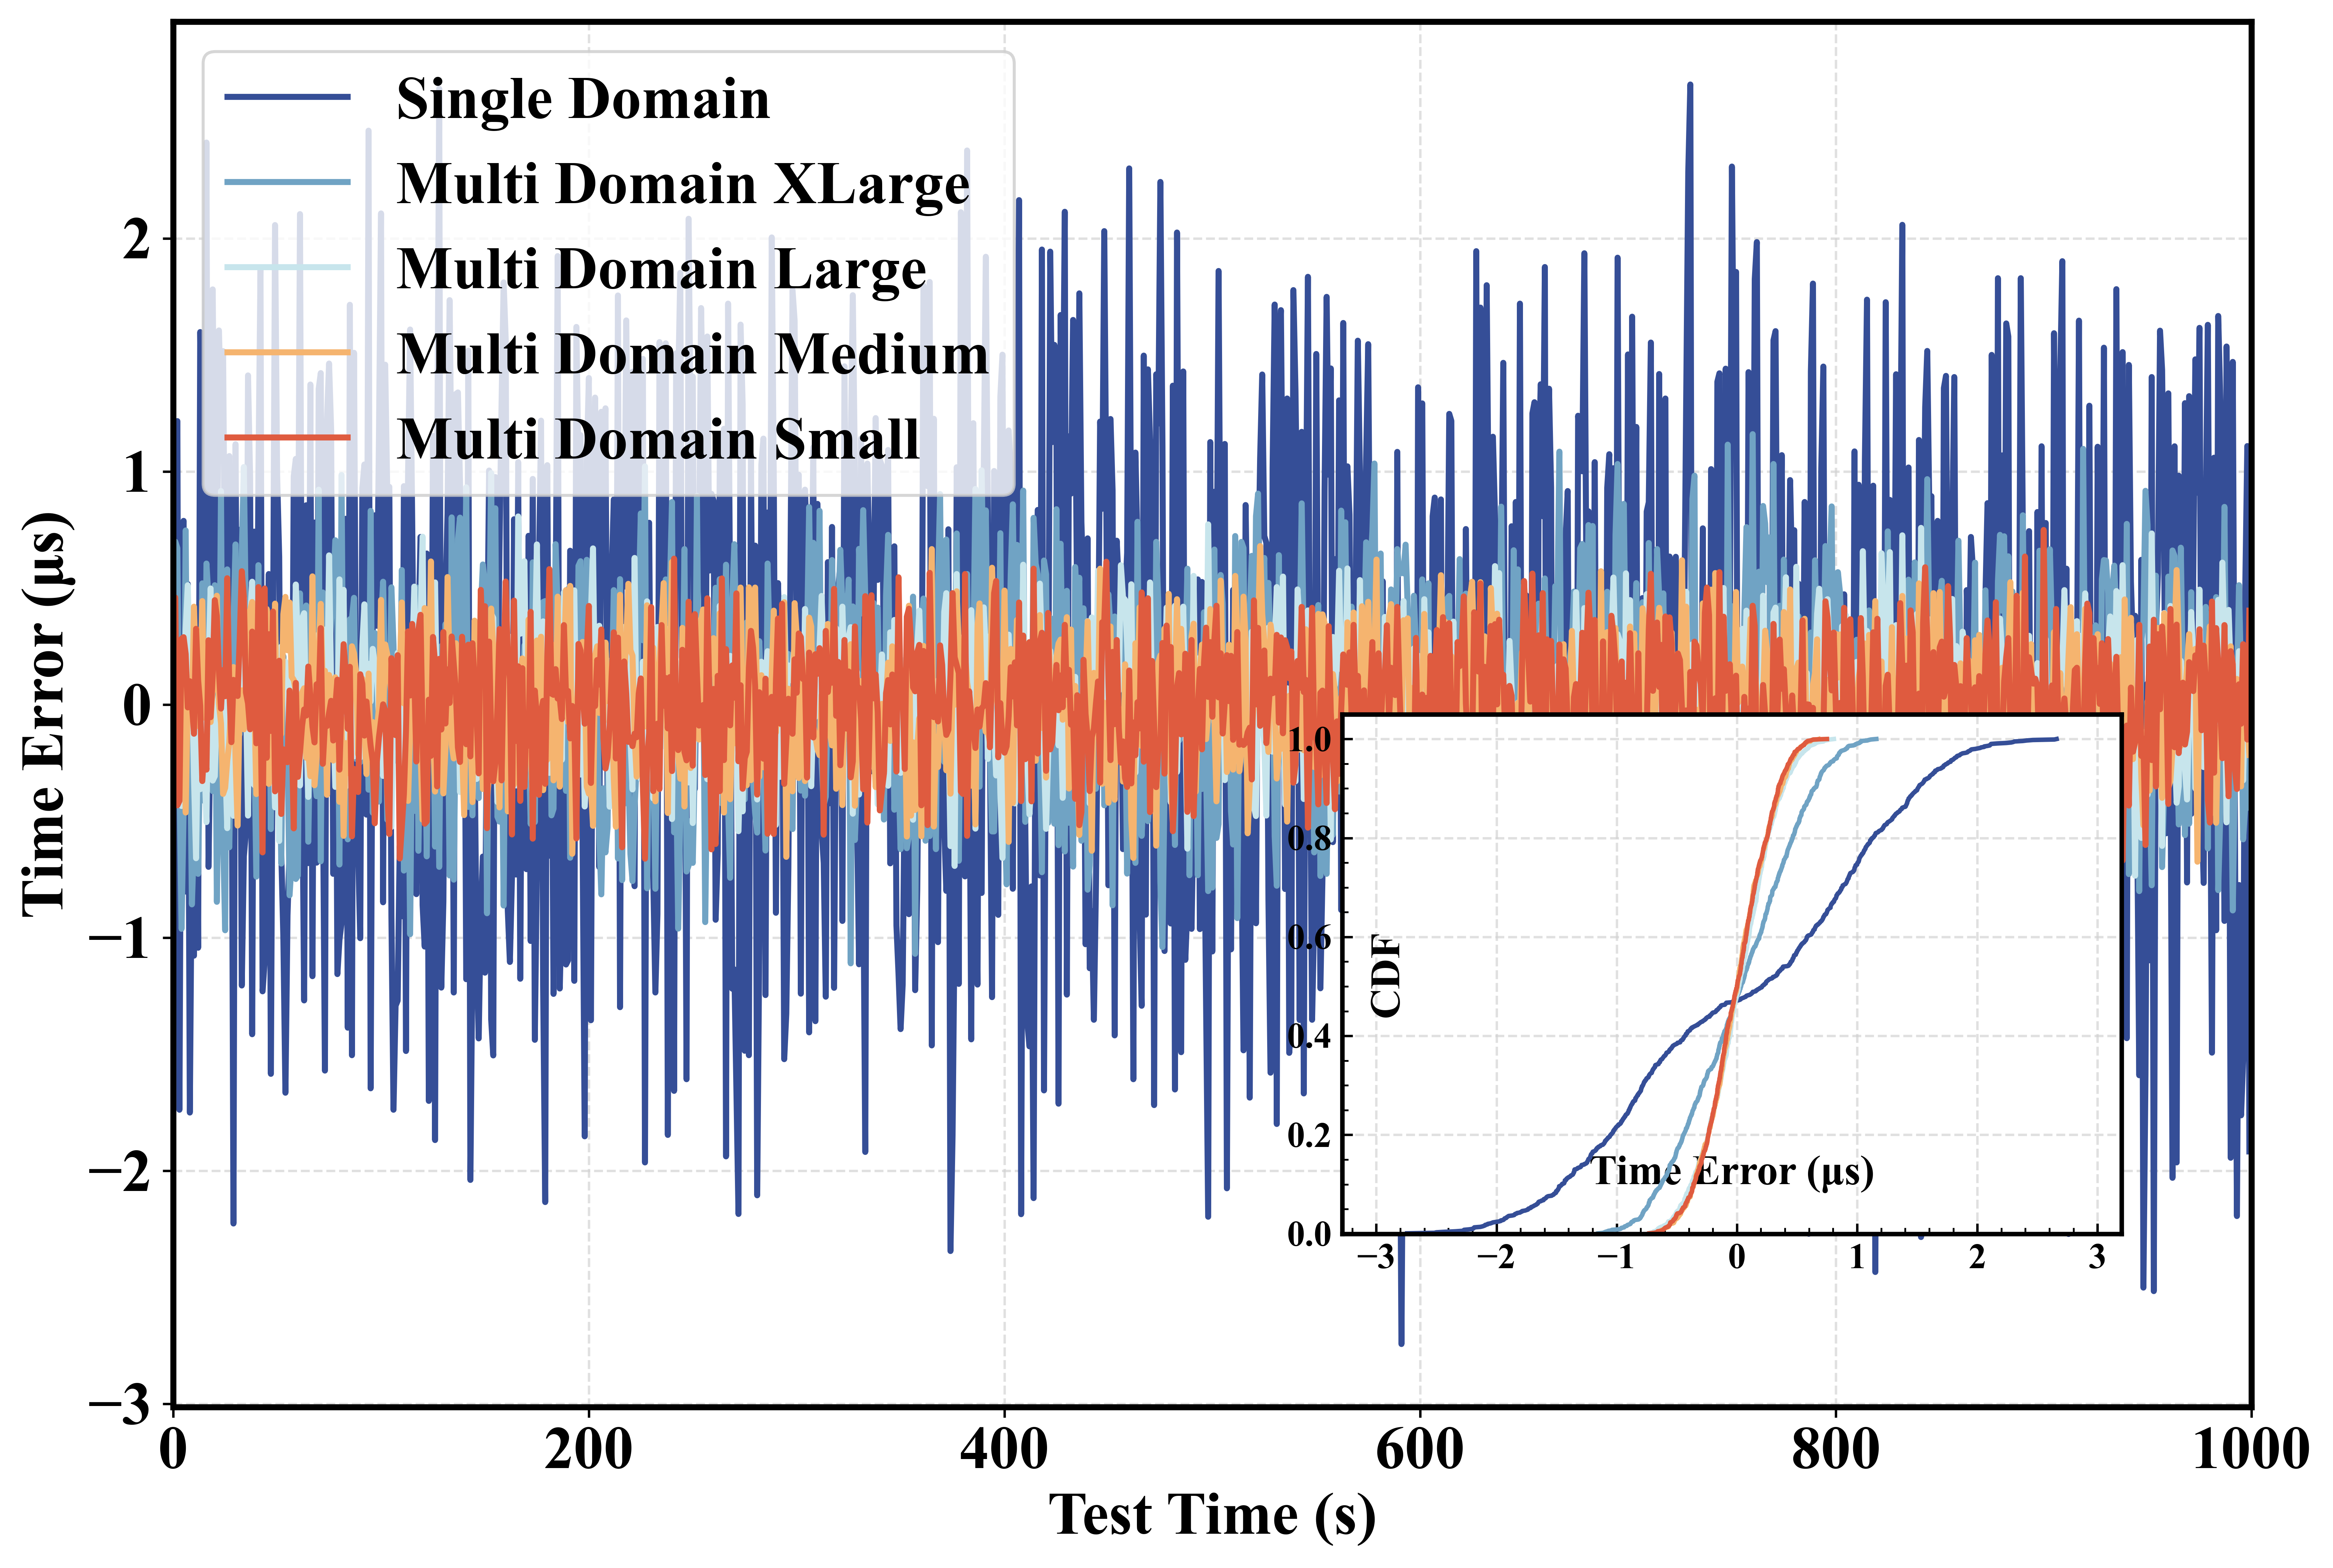

图像已保存到output_image文件夹中


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# 定义文件路径
file_paths = [
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_xlarge_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_large_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_medium_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_small_v3.csv"
]

# 定义图例标签
labels = [
    "Single Domain",
    "Multi Domain XLarge",
    "Multi Domain Large",
    "Multi Domain Medium",
    "Multi Domain Small"
]

# 定义颜色
colors = ['#354e97', '#70a3c4', '#c7e5ec', '#f5b46f', '#df5b3f']

# 存储处理后的数据
processed_data = []

# 循环处理每个文件
for file_path in file_paths:
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 提取"100"列数据
        column_data = df["100"].values
        
        # 将科学计数法的秒转换为微秒，并保留小数点后3位
        # 1秒 = 1,000,000微秒
        microseconds_data = [round(float(value) * 1000000, 3) for value in column_data]
        
        # 添加到处理后的数据列表
        processed_data.append(microseconds_data)
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")
        # 如果出错，添加空列表
        processed_data.append([])

# 创建主图，调整图形的外部边距
fig = plt.figure(figsize=(12, 8), dpi=600)
# 设置整个图形的背景为白色
fig.patch.set_facecolor('white')

# 通过指定主图的位置，为内嵌图留出足够空间
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # [左, 下, 宽, 高] 在规范化的坐标系(0-1)中
# 设置主图的背景为白色
ax.set_facecolor('white')

# 设置x轴的范围
x_max = 1000
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 确保数据长度不超过x_max+1
        if len(data) > x_max + 1:
            data = data[:x_max + 1]
        
        # 创建对应的x轴数据
        x = np.arange(len(data))
        
        # 绘制折线图
        ax.plot(x, data, color=colors[i], linewidth=2, label=labels[i])

# 设置图表属性
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')
ax.set_xlim(0, x_max)

# 设置图例在左上角
ax.legend(loc='upper left', frameon=True)

# 设置x轴和y轴为黑色加粗
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# 设置网格为浅灰色虚线
ax.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 在主图的右下角创建内嵌CDF图
# 指定内嵌图的位置和大小
inset_width = 0.3  # 主图宽度的30%
inset_height = 0.3  # 主图高度的30%
# 计算内嵌图的位置 - 右下角但稍微向左移
inset_left = 0.55  # 从左侧起点位置
inset_bottom = 0.2  # 从底部起点位置

# 创建内嵌图
axins = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])
# 设置内嵌图的背景为白色
axins.set_facecolor('white')

# 预处理数据，确定CDF图的实际数据范围
all_data_values = []
for data in processed_data:
    if len(data) > 0:
        all_data_values.extend(data)

if all_data_values:
    data_min = min(all_data_values)
    data_max = max(all_data_values)
    # 添加一些边距
    data_range = data_max - data_min
    x_min_cdf = data_min - data_range * 0.1
    x_max_cdf = data_max + data_range * 0.1
else:
    x_min_cdf, x_max_cdf = -1, 1  # 默认值，如果没有数据

# 首先设置CDF图的范围，确保背景覆盖整个区域
axins.set_xlim(x_min_cdf, x_max_cdf)
axins.set_ylim(0, 1.05)

# 绘制每组数据的CDF
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 计算CDF
        data_sorted = np.sort(data)
        # 计算累积概率
        cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
        
        # 绘制CDF曲线
        axins.plot(data_sorted, cdf, color=colors[i], linewidth=1.5)

# 设置内嵌图的属性 - 使用更小的字体
axins.set_xlabel('Time Error (μs)', fontweight='bold', fontsize=14, labelpad=-40)
axins.set_ylabel('CDF', fontweight='bold', fontsize=14, labelpad=-40)

# 确保刻度朝内 - 修改这一部分以确保刻度朝内
axins.tick_params(axis='both', which='both', direction='in', labelsize=12)
# 对于次要刻度也需要设置朝内
axins.minorticks_on()  # 启用次要刻度
axins.tick_params(which='minor', direction='in')

# 为内嵌图设置边框和网格
for spine in axins.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)
axins.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 创建输出目录
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存图片 - 现在不需要透明背景，因为我们设置了白色背景
plt.savefig(os.path.join(output_dir, 'gptp_time_error_with_inset_cdf.png'), 
            dpi=600, 
            bbox_inches='tight',  
            transparent=False)  # 不使用透明背景

# 显示图像
plt.show()

print("图像已保存到output_image文件夹中")

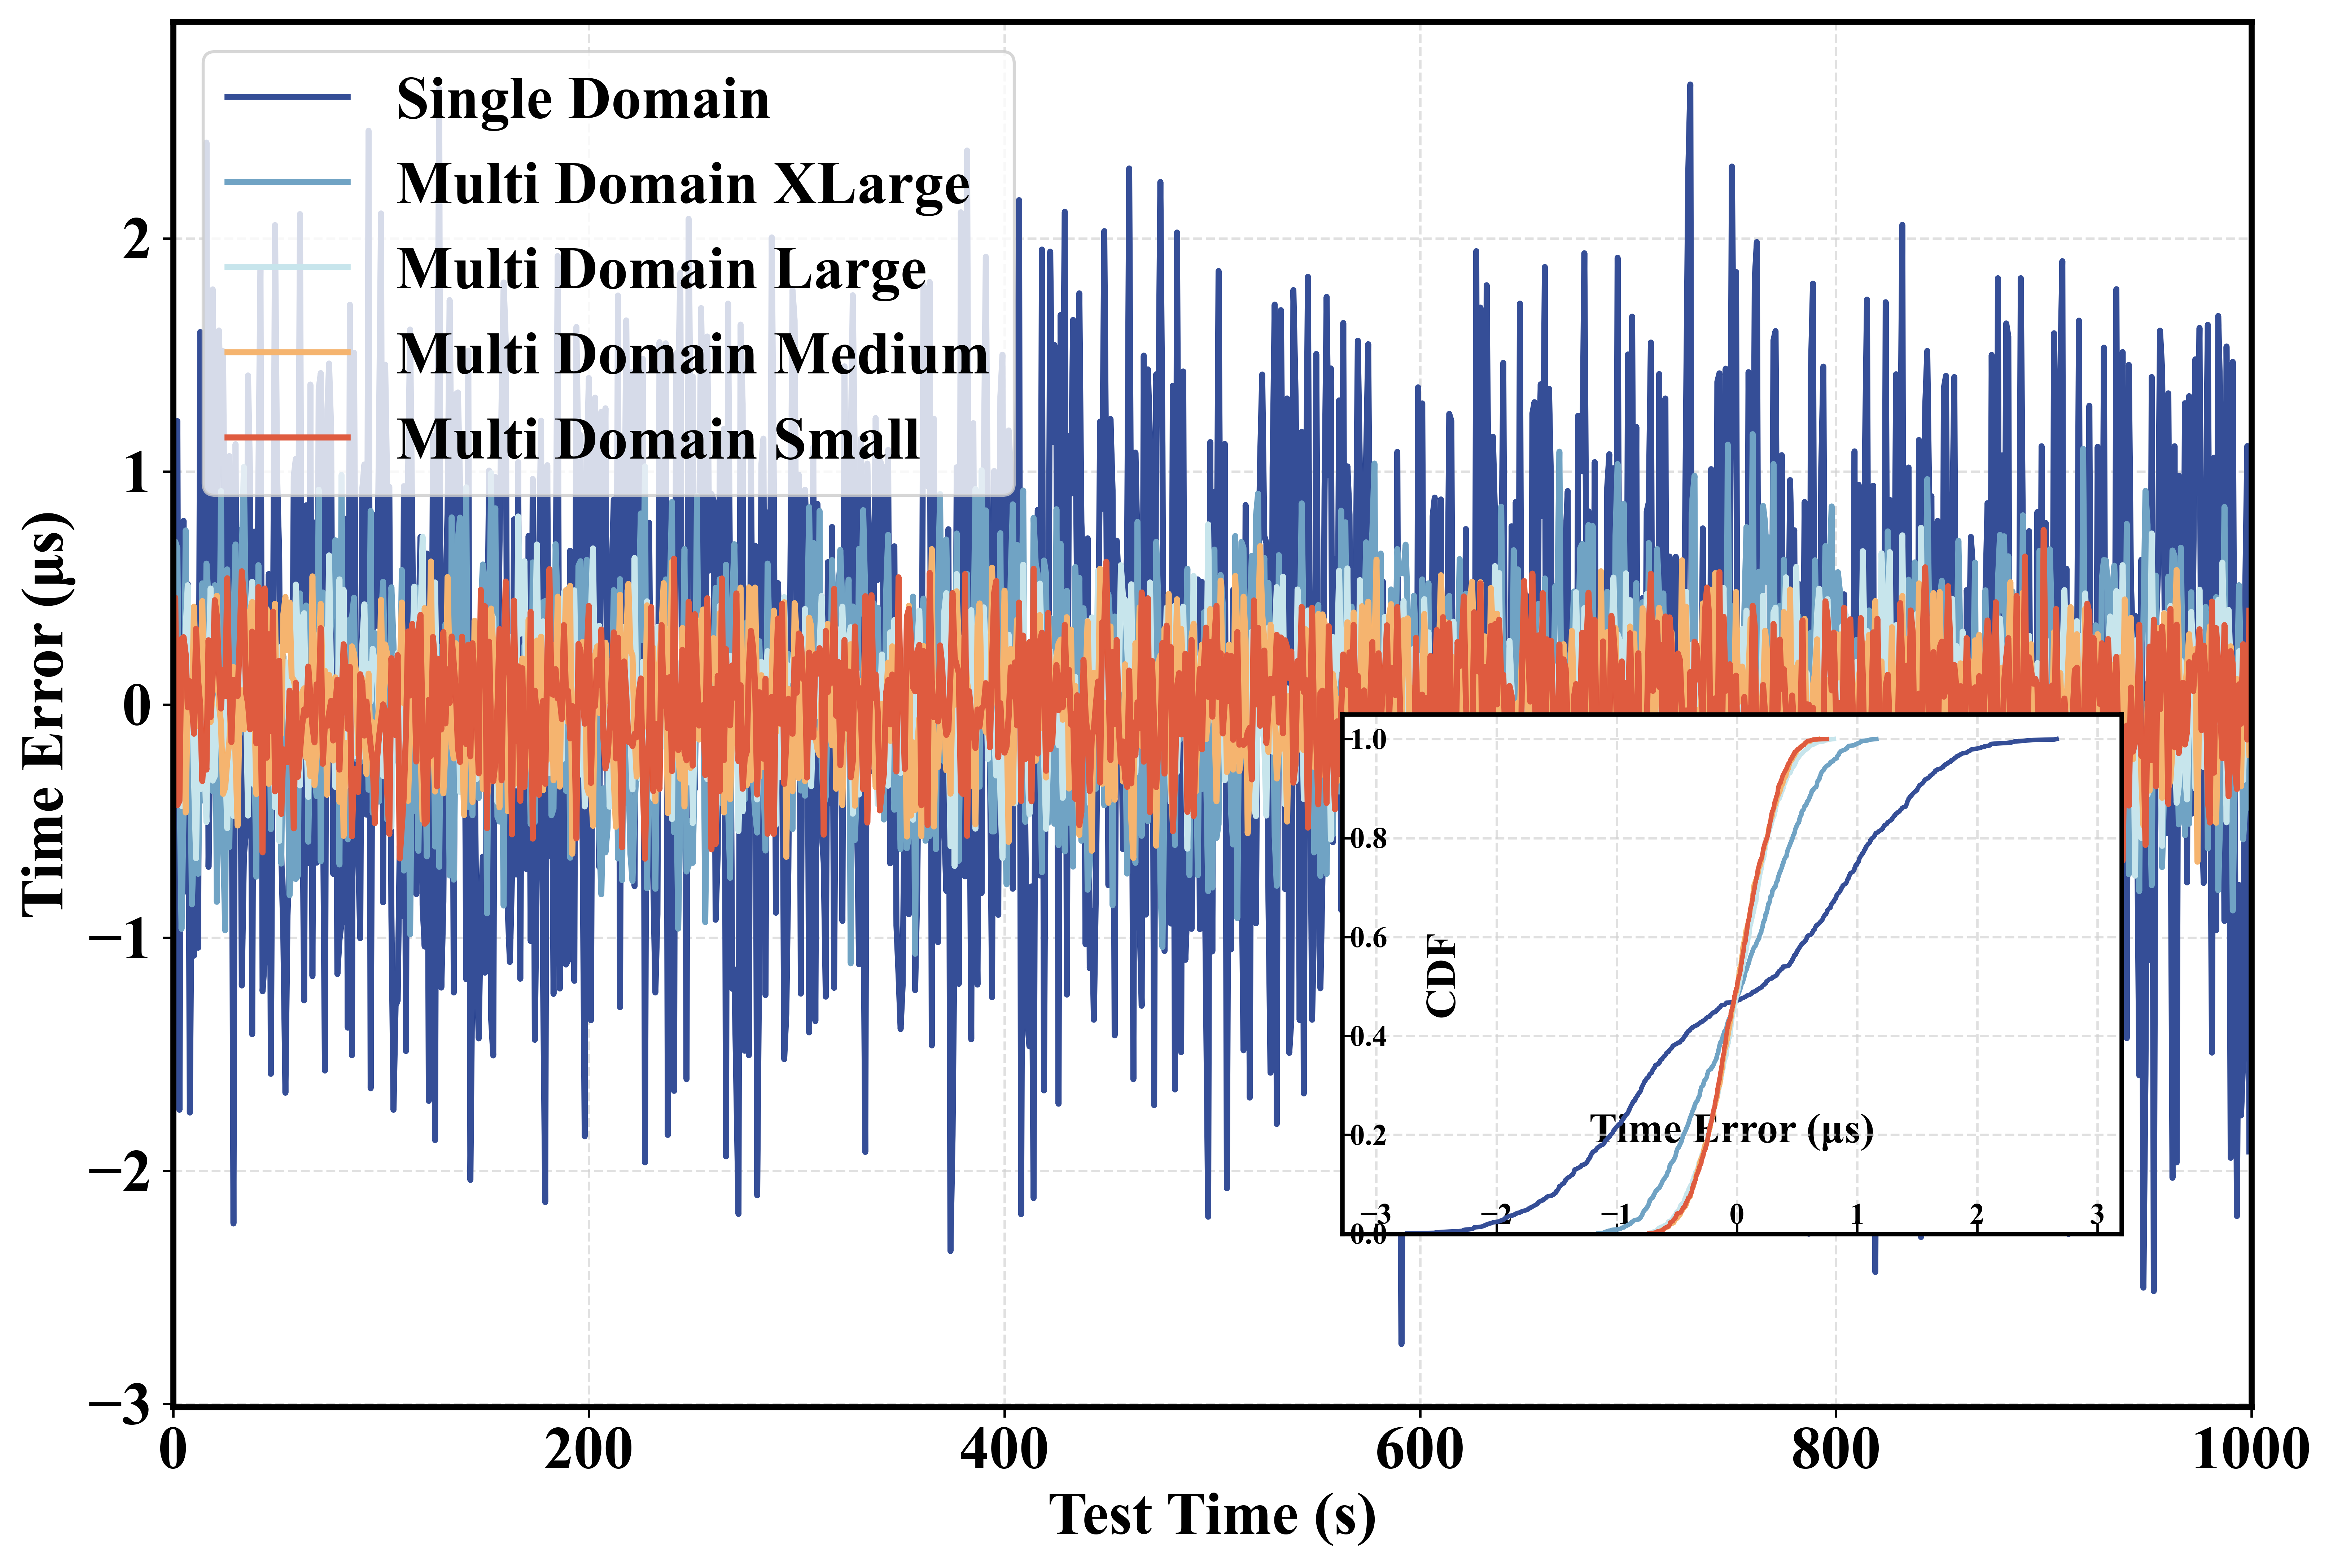

图像已保存到output_image文件夹中


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# 定义文件路径
file_paths = [
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_xlarge_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_large_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_medium_v3.csv",
    r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_small_v3.csv"
]

# 定义图例标签
labels = [
    "Single Domain",
    "Multi Domain XLarge",
    "Multi Domain Large",
    "Multi Domain Medium",
    "Multi Domain Small"
]

# 定义颜色
colors = ['#354e97', '#70a3c4', '#c7e5ec', '#f5b46f', '#df5b3f']

# 存储处理后的数据
processed_data = []

# 循环处理每个文件
for file_path in file_paths:
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 提取"100"列数据
        column_data = df["100"].values
        
        # 将科学计数法的秒转换为微秒，并保留小数点后3位
        # 1秒 = 1,000,000微秒
        microseconds_data = [round(float(value) * 1000000, 3) for value in column_data]
        
        # 添加到处理后的数据列表
        processed_data.append(microseconds_data)
        
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")
        # 如果出错，添加空列表
        processed_data.append([])

# 创建主图，调整图形的外部边距
fig = plt.figure(figsize=(12, 8), dpi=600)
# 设置整个图形的背景为白色
fig.patch.set_facecolor('white')

# 通过指定主图的位置，为内嵌图留出足够空间
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # [左, 下, 宽, 高] 在规范化的坐标系(0-1)中
# 设置主图的背景为白色
ax.set_facecolor('white')

# 设置x轴的范围
x_max = 1000
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 确保数据长度不超过x_max+1
        if len(data) > x_max + 1:
            data = data[:x_max + 1]
        
        # 创建对应的x轴数据
        x = np.arange(len(data))
        
        # 绘制折线图
        ax.plot(x, data, color=colors[i], linewidth=2, label=labels[i])

# 设置图表属性
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')
ax.set_xlim(0, x_max)

# 设置图例在左上角
ax.legend(loc='upper left', frameon=True)

# 设置x轴和y轴为黑色加粗
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(2)

# 设置网格为浅灰色虚线
ax.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 在主图的右下角创建内嵌CDF图
# 指定内嵌图的位置和大小
inset_width = 0.3  # 主图宽度的30%
inset_height = 0.3  # 主图高度的30%
# 计算内嵌图的位置 - 右下角但稍微向左移
inset_left = 0.55  # 从左侧起点位置
inset_bottom = 0.2  # 从底部起点位置

# 创建内嵌图
axins = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])
# 设置内嵌图的背景为白色
axins.set_facecolor('white')

# 预处理数据，确定CDF图的实际数据范围
all_data_values = []
for data in processed_data:
    if len(data) > 0:
        all_data_values.extend(data)

if all_data_values:
    data_min = min(all_data_values)
    data_max = max(all_data_values)
    # 添加一些边距
    data_range = data_max - data_min
    x_min_cdf = data_min - data_range * 0.1
    x_max_cdf = data_max + data_range * 0.1
else:
    x_min_cdf, x_max_cdf = -1, 1  # 默认值，如果没有数据

# 首先设置CDF图的范围，确保背景覆盖整个区域
axins.set_xlim(x_min_cdf, x_max_cdf)
axins.set_ylim(0, 1.05)

# 绘制每组数据的CDF
for i, data in enumerate(processed_data):
    if len(data) > 0:
        # 计算CDF
        data_sorted = np.sort(data)
        # 计算累积概率
        cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
        
        # 绘制CDF曲线
        axins.plot(data_sorted, cdf, color=colors[i], linewidth=1.5)

# 设置内嵌图的属性 - 使用更小的字体
axins.set_xlabel('Time Error (μs)', fontweight='bold', fontsize=14, labelpad=-40)
axins.set_ylabel('CDF', fontweight='bold', fontsize=14, labelpad=-40)

# 设置刻度朝内
axins.tick_params(axis='both', which='both', direction='in', labelsize=10)

# 关键修改：将刻度标签（数字）放在轴内侧
# 对于x轴，将标签放在上方
axins.xaxis.set_tick_params(labeltop=False, labelbottom=True, pad=-10)
# 对于y轴，将标签放在右侧
axins.yaxis.set_tick_params(labelright=False, labelleft=True, pad=-15)

# 为内嵌图设置边框和网格
for spine in axins.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)
axins.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# 创建输出目录
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存图片 - 现在不需要透明背景，因为我们设置了白色背景
plt.savefig(os.path.join(output_dir, 'gptp_time_error_with_inset_cdf_v2.png'), 
            dpi=600, 
            bbox_inches='tight',  
            transparent=False)  # 不使用透明背景

# 显示图像
plt.show()

print("图像已保存到output_image文件夹中")

# 将不同时间间隔的 折线图（Line Chart），并结合了 区间填充（Shaded Area Plot）

In [ ]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/16 19:22
*  @Project :   pj_gptp_simulation
*  @Description :   将不同时间间隔的 折线图（Line Chart），并结合了 区间填充（Shaded Area Plot）
*  @FileName:   main20250416.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)

# Define different domain size configurations to test
DOMAIN_SIZE_CONFIGS = {
    'small': 5,  # 5 hops per domain (20 domains total)
    'medium': 10,  # 10 hops per domain (10 domains total)
    'large': 20,  # 20 hops per domain (5 domains total)
    'xlarge': 50,  # 50 hops per domain (2 domains total)
}


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size):
    """
    Calculate time synchronization error with multi-domain approach.

    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries

    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1

    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain)

    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error

    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors

    return total_error


# Generate data for single domain approach (original method)
print("Generating data for single domain approach...")
start_time = time.time()
single_domain_data = {}
for h in range(1, TOTAL_HOPS + 1):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
single_df.to_csv("output_data/single_domain_data_v3.csv", index=False)
print(f"Single domain simulation completed in {time.time() - start_time:.2f} seconds")

# Generate data for multi-domain approach with different domain sizes
multi_domain_results = {}

for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    print(f"Generating data for multi-domain approach with {domain_size} hops per domain ({config_name})...")
    start_time = time.time()

    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with domain size {domain_size}...")
        hop_errors = [calculate_multi_domain_time_error(h, domain_size) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors

    # Store the results for this configuration
    multi_domain_results[config_name] = multi_domain_data

    # Save multi-domain data to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{config_name}_v3.csv", index=False)
    print(f"{config_name} domain simulation completed in {time.time() - start_time:.2f} seconds")

# PLOTTING SECTION

# Plot 1: Comparison of Time Error CDF for hop 100 across all configurations
plt.figure(figsize=(14, 10))

# Single domain data for hop 100
errors_single = np.array(single_domain_data[TOTAL_HOPS])
errors_single_us = errors_single * 1e6  # Convert to microseconds
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

plt.plot(sorted_errors_single, cumulative_prob_single,
         label=f'Single Domain',
         color='#E41A1C',  # red
         linewidth=2)

# Color map for multi-domain configurations
config_colors = {
    'small': '#377EB8',  # blue
    'medium': '#4DAF4A',  # green
    'large': '#984EA3',  # purple
    'xlarge': '#FF7F00',  # orange
}

# Plot each multi-domain configuration
for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    errors_multi = np.array(multi_domain_results[config_name][TOTAL_HOPS])
    errors_multi_us = errors_multi * 1e6  # Convert to microseconds
    sorted_errors_multi = np.sort(errors_multi_us)
    cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))

    # Calculate statistics for annotations
    single_median = np.median(np.abs(errors_single_us))
    multi_median = np.median(np.abs(errors_multi_us))

    plt.plot(sorted_errors_multi, cumulative_prob_multi,
             label=f'Domain Size {domain_size} ({config_name}) - Median: {multi_median:.2f}μs',
             color=config_colors[config_name],
             linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Time Error Comparison: Different Domain Sizes (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_size_comparison_cdf_v3.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for all approaches (both absolute and real values)
for error_type in ['absolute', 'real']:
    plt.figure(figsize=(16, 12))

    # Prepare data for single domain
    single_domain_errors = {}
    for h in range(1, TOTAL_HOPS + 1, 5):  # Sample every 5 hops for clarity
        errors = np.array(single_domain_data[h])
        errors_us = errors * 1e6  # Convert to microseconds

        if error_type == 'absolute':
            single_domain_errors[h] = np.abs(errors_us)
        else:
            single_domain_errors[h] = errors_us

    # Plot for single domain
    hops = list(single_domain_errors.keys())
    single_medians = [np.median(single_domain_errors[h]) for h in hops]
    single_q1 = [np.percentile(single_domain_errors[h], 25) for h in hops]
    single_q3 = [np.percentile(single_domain_errors[h], 75) for h in hops]

    plt.plot(hops, single_medians, 'o-', color='#E41A1C', label='Single Domain',
             linewidth=2, markersize=8, zorder=10)
    plt.fill_between(hops, single_q1, single_q3, color='#E41A1C', alpha=0.2)

    # Plot for each multi-domain configuration
    for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
        multi_domain_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):
            errors = np.array(multi_domain_results[config_name][h])
            errors_us = errors * 1e6

            if error_type == 'absolute':
                multi_domain_errors[h] = np.abs(errors_us)
            else:
                multi_domain_errors[h] = errors_us

        multi_medians = [np.median(multi_domain_errors[h]) for h in hops]
        multi_q1 = [np.percentile(multi_domain_errors[h], 25) for h in hops]
        multi_q3 = [np.percentile(multi_domain_errors[h], 75) for h in hops]

        plt.plot(hops, multi_medians, 's-', color=config_colors[config_name],
                 label=f'Domain Size {domain_size} ({config_name})',
                 linewidth=2, markersize=8, zorder=5)
        plt.fill_between(hops, multi_q1, multi_q3, color=config_colors[config_name], alpha=0.2)

        # Add vertical lines at domain boundaries for this configuration
        if config_name == 'medium':  # Only show domain boundaries for medium (default) to avoid clutter
            num_domains = TOTAL_HOPS // domain_size
            for i in range(1, num_domains):
                boundary = i * domain_size
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)

    # Configure plot appearance
    plt.grid(True, alpha=0.3)
    plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')

    if error_type == 'absolute':
        plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Absolute Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_absolute_error_v3.png", dpi=600)
    else:
        plt.ylabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Real Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_real_error_v3.png", dpi=600)

    plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black',
               prop={'family': 'Times New Roman'}, loc='best')
    plt.xticks(fontname='Times New Roman', fontsize=20)
    plt.yticks(fontname='Times New Roman', fontsize=20)
    plt.tight_layout()
    plt.close()

# Plot 3: Domain Size Impact Analysis (Box plot at hop 100)
plt.figure(figsize=(14, 10))

# Prepare data for boxplot
box_data = []
labels = ['Single Domain']

# First, add single domain data
single_errors = np.array(single_domain_data[TOTAL_HOPS]) * 1e6  # Convert to microseconds
box_data.append(np.abs(single_errors))  # Use absolute errors

# Then add data for each domain size configuration
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6
    box_data.append(np.abs(multi_errors))
    labels.append(f'Size {domain_size}\n({config_name})')

# Create boxplot
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False,
                      medianprops={'color': 'black', 'linewidth': 2})

# Color boxes
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Domain Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Domain Size on Time Error (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')

# Add numeric annotations for median values
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs',
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/domain_size_impact_boxplot_v3.png", dpi=600)
plt.close()

# Plot 4: Optimal Domain Size Analysis
# Calculate median error at hop 100 for each configuration
all_configs = ['Single'] + list(DOMAIN_SIZE_CONFIGS.keys())
median_errors = []
num_domains = []

# Single domain (1 domain total)
single_errors = np.abs(np.array(single_domain_data[TOTAL_HOPS]) * 1e6)
median_errors.append(np.median(single_errors))
num_domains.append(1)

# Multi-domain configurations
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.abs(np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6)
    median_errors.append(np.median(multi_errors))
    num_domains.append(TOTAL_HOPS // domain_size)  # Number of domains

# Plot domain count vs. error
plt.figure(figsize=(14, 10))
plt.plot(num_domains, median_errors, 'o-', color='#377EB8', linewidth=3, markersize=12)

# Add labels for each point
for i, (x, y, config) in enumerate(zip(num_domains, median_errors, all_configs)):
    plt.annotate(f'{config}\n({TOTAL_HOPS / num_domains[i]:.0f} hops/domain)',
                 (x, y), textcoords="offset points",
                 xytext=(0, 10), ha='center',
                 fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Find and mark the optimal point
optimal_idx = np.argmin(median_errors)
plt.plot(num_domains[optimal_idx], median_errors[optimal_idx], 'o',
         color='red', markersize=15, label='Optimal')

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Number of Domains', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Median Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Optimal Domain Count Analysis (Total {TOTAL_HOPS} hops)',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/optimal_domain_count_v3.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

In [10]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/16 19:22
*  @Project :   pj_gptp_simulation
*  @Description :   将不同时间间隔的 折线图（Line Chart），并结合了 区间填充（Shaded Area Plot）
*  @FileName:   main20250416.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Different sync intervals to test (in seconds)
SYNC_INTERVALS = {
    'fast': 31.25e-3,       # 10 ms
    'medium': 125e-3,  # 31.25 ms (default)
    'slow': 1.0       # 100 ms
}

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)
DOMAIN_SIZE = 10  # Fixed at 10 hops per domain for all multi-domain simulations


def calculate_time_error(hops, sync_interval):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size, sync_interval):
    """
    Calculate time synchronization error with multi-domain approach.

    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries

    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
        sync_interval: Time between synchronization messages
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1

    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain, sync_interval)

    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error

    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors

    return total_error


# Dictionary to store all simulation results
all_results = {}

# Generate data for single domain approach with different sync intervals
for interval_name, sync_interval in SYNC_INTERVALS.items():
    print(f"Generating data for single domain approach with {interval_name} sync interval ({sync_interval*1000:.2f} ms)...")
    start_time = time.time()
    
    single_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating single domain hop {h} with {interval_name} sync interval...")
        hop_errors = [calculate_time_error(h, sync_interval) for _ in range(NUM_SAMPLES)]
        single_domain_data[h] = hop_errors
    
    # Save to CSV
    single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    single_df.to_csv(f"output_data/single_domain_data_{interval_name}_v3.csv", index=False)
    
    # Store results
    all_results[f"single_{interval_name}"] = single_domain_data
    
    print(f"Single domain simulation with {interval_name} sync interval completed in {time.time() - start_time:.2f} seconds")

# Generate data for multi-domain approach with different sync intervals
for interval_name, sync_interval in SYNC_INTERVALS.items():
    print(f"Generating data for multi-domain approach with {interval_name} sync interval ({sync_interval*1000:.2f} ms)...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with {interval_name} sync interval...")
        hop_errors = [calculate_multi_domain_time_error(h, DOMAIN_SIZE, sync_interval) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # Save to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{interval_name}_v3.csv", index=False)
    
    # Store results
    all_results[f"multi_{interval_name}"] = multi_domain_data
    
    print(f"Multi-domain simulation with {interval_name} sync interval completed in {time.time() - start_time:.2f} seconds")

# PLOTTING SECTION

# Plot 1: Comparison of Time Error CDF for hop 100 across all configurations
plt.figure(figsize=(14, 10))

# Color and style scheme for different configurations
colors = {
    'fast': '#E41A1C',    # red
    'medium': '#377EB8',  # blue
    'slow': '#4DAF4A'     # green
}

line_styles = {
    'single': '-',
    'multi': '--'
}

# Plot CDF for all configurations
for sync_type in ['single', 'multi']:
    for interval_name in ['fast', 'medium', 'slow']:
        config_key = f"{sync_type}_{interval_name}"
        errors = np.array(all_results[config_key][TOTAL_HOPS])
        errors_us = errors * 1e6  # Convert to microseconds
        sorted_errors = np.sort(errors_us)
        cumulative_prob = np.linspace(0, 1, len(sorted_errors))
        
        # Create label
        if sync_type == 'single':
            domain_label = "No Domain Division"
        else:
            domain_label = f"With Domain Division ({DOMAIN_SIZE} hops)"
        
        interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
        
        plt.plot(sorted_errors, cumulative_prob,
                 label=f'{interval_ms:.2f}ms Sync - {domain_label}',
                 color=colors[interval_name],
                 linestyle=line_styles[sync_type],
                 linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Time Error Comparison: Different Sync Intervals and Domain Approaches (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/sync_interval_comparison_cdf_v3.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for all configurations (absolute values)
plt.figure(figsize=(16, 12))

# Create a line for each configuration
for sync_type in ['single', 'multi']:
    for interval_name in ['fast', 'medium', 'slow']:
        config_key = f"{sync_type}_{interval_name}"
        
        # Prepare data
        hop_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):  # Sample every 5 hops for clarity
            errors = np.array(all_results[config_key][h])
            errors_us = errors * 1e6  # Convert to microseconds
            hop_errors[h] = np.abs(errors_us)  # Use absolute errors
        
        # Plot median values with error bands
        hops = list(hop_errors.keys())
        medians = [np.median(hop_errors[h]) for h in hops]
        q1 = [np.percentile(hop_errors[h], 25) for h in hops]
        q3 = [np.percentile(hop_errors[h], 75) for h in hops]
        
        # Create label
        marker = 'o' if sync_type == 'single' else 's'
        interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
        label = f"{interval_ms:.2f}ms Sync - "
        label += "No Domain Division" if sync_type == 'single' else f"Domain Size {DOMAIN_SIZE}"
        
        plt.plot(hops, medians, marker + line_styles[sync_type], 
                 color=colors[interval_name], 
                 label=label,
                 linewidth=2, markersize=8)
        
        plt.fill_between(hops, q1, q3, color=colors[interval_name], alpha=0.2)
        
        # Add vertical lines at domain boundaries for multi-domain
        if sync_type == 'multi' and interval_name == 'medium':  # Only show for medium interval to avoid clutter
            num_domains = TOTAL_HOPS // DOMAIN_SIZE
            for i in range(1, num_domains):
                boundary = i * DOMAIN_SIZE
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'}, loc='best')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Absolute Time Error vs. Hop Number for Different Sync Intervals and Domain Approaches',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/hop_vs_absolute_error_all_configs_v3.png", dpi=600)
plt.close()

# Plot 3: Box plot comparing all configurations at hop 100
plt.figure(figsize=(14, 10))

# Prepare data for boxplot
box_data = []
labels = []

# Add data for each configuration
for interval_name in ['fast', 'medium', 'slow']:
    interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
    
    # Single domain
    single_errors = np.abs(np.array(all_results[f"single_{interval_name}"][TOTAL_HOPS]) * 1e6)
    box_data.append(single_errors)
    labels.append(f'{interval_ms:.2f}ms\nNo Division')
    
    # Multi-domain
    multi_errors = np.abs(np.array(all_results[f"multi_{interval_name}"][TOTAL_HOPS]) * 1e6)
    box_data.append(multi_errors)
    labels.append(f'{interval_ms:.2f}ms\nDomain Size {DOMAIN_SIZE}')

# Create boxplot
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False,
                     medianprops={'color': 'black', 'linewidth': 2})

# Color boxes
box_colors = ['#E41A1C', '#E41A1C', '#377EB8', '#377EB8', '#4DAF4A', '#4DAF4A']  # Same color for same interval
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
# Alternating box styles for single vs multi-domain
for i, patch in enumerate(boxplot['boxes']):
    if i % 2 == 1:  # Multi-domain boxes
        patch.set_hatch('///')
        patch.set_alpha(0.5)

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Sync Interval and Domain Division on Time Error (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')

# Add numeric annotations for median values
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs',
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/sync_interval_domain_impact_boxplot_v3.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

Generating data for single domain approach with fast sync interval (31.25 ms)...
Simulating single domain hop 1 with fast sync interval...
Simulating single domain hop 2 with fast sync interval...
Simulating single domain hop 3 with fast sync interval...
Simulating single domain hop 4 with fast sync interval...
Simulating single domain hop 5 with fast sync interval...
Simulating single domain hop 6 with fast sync interval...
Simulating single domain hop 7 with fast sync interval...
Simulating single domain hop 8 with fast sync interval...
Simulating single domain hop 9 with fast sync interval...
Simulating single domain hop 10 with fast sync interval...
Simulating single domain hop 11 with fast sync interval...
Simulating single domain hop 12 with fast sync interval...
Simulating single domain hop 13 with fast sync interval...
Simulating single domain hop 14 with fast sync interval...
Simulating single domain hop 15 with fast sync interval...
Simulating single domain hop 16 with fast s

In [11]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/16 19:22
*  @Project :   pj_gptp_simulation
*  @Description :   将不同时间间隔的 折线图（Line Chart），并结合了 区间填充（Shaded Area Plot）
*  @FileName:   main20250416.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Different sync intervals to test (in seconds) - only keeping 10ms and 31.25ms
SYNC_INTERVALS = {
    'fast': 10e-3,       # 10 ms
    'medium': 31.25e-3,  # 31.25 ms (default)
}

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)
DOMAIN_SIZE = 10  # Fixed at 10 hops per domain for all multi-domain simulations


def calculate_time_error(hops, sync_interval):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size, sync_interval):
    """
    Calculate time synchronization error with multi-domain approach.

    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries

    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
        sync_interval: Time between synchronization messages
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1

    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain, sync_interval)

    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error

    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors

    return total_error


# Dictionary to store all simulation results
all_results = {}

# Generate data for single domain approach with different sync intervals
for interval_name, sync_interval in SYNC_INTERVALS.items():
    print(f"Generating data for single domain approach with {interval_name} sync interval ({sync_interval*1000:.2f} ms)...")
    start_time = time.time()
    
    single_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating single domain hop {h} with {interval_name} sync interval...")
        hop_errors = [calculate_time_error(h, sync_interval) for _ in range(NUM_SAMPLES)]
        single_domain_data[h] = hop_errors
    
    # Save to CSV
    single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    single_df.to_csv(f"output_data/single_domain_data_{interval_name}_v4.csv", index=False)
    
    # Store results
    all_results[f"single_{interval_name}"] = single_domain_data
    
    print(f"Single domain simulation with {interval_name} sync interval completed in {time.time() - start_time:.2f} seconds")

# Generate data for multi-domain approach with different sync intervals
for interval_name, sync_interval in SYNC_INTERVALS.items():
    print(f"Generating data for multi-domain approach with {interval_name} sync interval ({sync_interval*1000:.2f} ms)...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with {interval_name} sync interval...")
        hop_errors = [calculate_multi_domain_time_error(h, DOMAIN_SIZE, sync_interval) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # Save to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{interval_name}_v4.csv", index=False)
    
    # Store results
    all_results[f"multi_{interval_name}"] = multi_domain_data
    
    print(f"Multi-domain simulation with {interval_name} sync interval completed in {time.time() - start_time:.2f} seconds")

# PLOTTING SECTION

# Plot 1: Comparison of Time Error CDF for hop 100 across all configurations
plt.figure(figsize=(14, 10))

# Color and style scheme for different configurations
colors = {
    'fast': '#E41A1C',    # red
    'medium': '#377EB8',  # blue
}

line_styles = {
    'single': '-',
    'multi': '--'
}

# Plot CDF for all configurations
for sync_type in ['single', 'multi']:
    for interval_name in ['fast', 'medium']:
        config_key = f"{sync_type}_{interval_name}"
        errors = np.array(all_results[config_key][TOTAL_HOPS])
        errors_us = errors * 1e6  # Convert to microseconds
        sorted_errors = np.sort(errors_us)
        cumulative_prob = np.linspace(0, 1, len(sorted_errors))
        
        # Create label
        if sync_type == 'single':
            domain_label = "No Domain Division"
        else:
            domain_label = f"With Domain Division ({DOMAIN_SIZE} hops)"
        
        interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
        
        plt.plot(sorted_errors, cumulative_prob,
                 label=f'{interval_ms:.2f}ms Sync - {domain_label}',
                 color=colors[interval_name],
                 linestyle=line_styles[sync_type],
                 linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Time Error Comparison: Different Sync Intervals and Domain Approaches (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/sync_interval_comparison_cdf_v4.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for all configurations (absolute values)
plt.figure(figsize=(16, 12))

# Create a line for each configuration
for sync_type in ['single', 'multi']:
    for interval_name in ['fast', 'medium']:
        config_key = f"{sync_type}_{interval_name}"
        
        # Prepare data
        hop_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):  # Sample every 5 hops for clarity
            errors = np.array(all_results[config_key][h])
            errors_us = errors * 1e6  # Convert to microseconds
            hop_errors[h] = np.abs(errors_us)  # Use absolute errors
        
        # Plot median values with error bands
        hops = list(hop_errors.keys())
        medians = [np.median(hop_errors[h]) for h in hops]
        q1 = [np.percentile(hop_errors[h], 25) for h in hops]
        q3 = [np.percentile(hop_errors[h], 75) for h in hops]
        
        # Create label
        marker = 'o' if sync_type == 'single' else 's'
        interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
        label = f"{interval_ms:.2f}ms Sync - "
        label += "No Domain Division" if sync_type == 'single' else f"Domain Size {DOMAIN_SIZE}"
        
        plt.plot(hops, medians, marker + line_styles[sync_type], 
                 color=colors[interval_name], 
                 label=label,
                 linewidth=2, markersize=8)
        
        plt.fill_between(hops, q1, q3, color=colors[interval_name], alpha=0.2)
        
        # Add vertical lines at domain boundaries for multi-domain
        if sync_type == 'multi' and interval_name == 'medium':  # Only show for medium interval to avoid clutter
            num_domains = TOTAL_HOPS // DOMAIN_SIZE
            for i in range(1, num_domains):
                boundary = i * DOMAIN_SIZE
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'}, loc='best')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Absolute Time Error vs. Hop Number for Different Sync Intervals and Domain Approaches',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/hop_vs_absolute_error_all_configs_v4.png", dpi=600)
plt.close()

# Plot 3: Box plot comparing all configurations at hop 100
plt.figure(figsize=(14, 10))

# Prepare data for boxplot
box_data = []
labels = []

# Add data for each configuration
for interval_name in ['fast', 'medium']:
    interval_ms = SYNC_INTERVALS[interval_name] * 1000  # Convert to ms
    
    # Single domain
    single_errors = np.abs(np.array(all_results[f"single_{interval_name}"][TOTAL_HOPS]) * 1e6)
    box_data.append(single_errors)
    labels.append(f'{interval_ms:.2f}ms\nNo Division')
    
    # Multi-domain
    multi_errors = np.abs(np.array(all_results[f"multi_{interval_name}"][TOTAL_HOPS]) * 1e6)
    box_data.append(multi_errors)
    labels.append(f'{interval_ms:.2f}ms\nDomain Size {DOMAIN_SIZE}')

# Create boxplot
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False,
                     medianprops={'color': 'black', 'linewidth': 2})

# Color boxes
box_colors = ['#E41A1C', '#E41A1C', '#377EB8', '#377EB8']  # Same color for same interval
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    
# Alternating box styles for single vs multi-domain
for i, patch in enumerate(boxplot['boxes']):
    if i % 2 == 1:  # Multi-domain boxes
        patch.set_hatch('///')
        patch.set_alpha(0.5)

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Sync Interval and Domain Division on Time Error (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')

# Add numeric annotations for median values
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs',
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/sync_interval_domain_impact_boxplot_v4.png", dpi=600)
plt.close()

# Plot 4: Sync Interval Impact Analysis (separated by domain approach)
plt.figure(figsize=(14, 10))

# Prepare data for analysis
interval_values = [SYNC_INTERVALS[interval] * 1000 for interval in ['fast', 'medium']]  # in ms
single_medians = []
multi_medians = []

for interval_name in ['fast', 'medium']:
    # Single domain
    single_errors = np.abs(np.array(all_results[f"single_{interval_name}"][TOTAL_HOPS]) * 1e6)
    single_medians.append(np.median(single_errors))
    
    # Multi-domain
    multi_errors = np.abs(np.array(all_results[f"multi_{interval_name}"][TOTAL_HOPS]) * 1e6)
    multi_medians.append(np.median(multi_errors))

# Plot
plt.plot(interval_values, single_medians, 'o-', color='#E41A1C', linewidth=3, markersize=12, 
         label='No Domain Division')
plt.plot(interval_values, multi_medians, 's-', color='#377EB8', linewidth=3, markersize=12, 
         label=f'With Domain Division ({DOMAIN_SIZE} hops)')

# Add annotations
for i, (x, y_single, y_multi) in enumerate(zip(interval_values, single_medians, multi_medians)):
    plt.annotate(f'{y_single:.2f}μs', (x, y_single), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#E41A1C", alpha=0.8))
    
    plt.annotate(f'{y_multi:.2f}μs', (x, y_multi), textcoords="offset points",
                 xytext=(0, -25), ha='center', fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#377EB8", alpha=0.8))

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Sync Interval (ms)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Median Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black',
           prop={'family': 'Times New Roman'}, loc='best')
plt.xticks(interval_values, [f'{x:.2f}' for x in interval_values], 
           fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Sync Interval on Time Error (Hop {TOTAL_HOPS})',
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/sync_interval_impact_analysis_v4.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

Generating data for single domain approach with fast sync interval (10.00 ms)...
Simulating single domain hop 1 with fast sync interval...
Simulating single domain hop 2 with fast sync interval...
Simulating single domain hop 3 with fast sync interval...
Simulating single domain hop 4 with fast sync interval...
Simulating single domain hop 5 with fast sync interval...
Simulating single domain hop 6 with fast sync interval...
Simulating single domain hop 7 with fast sync interval...
Simulating single domain hop 8 with fast sync interval...
Simulating single domain hop 9 with fast sync interval...
Simulating single domain hop 10 with fast sync interval...
Simulating single domain hop 11 with fast sync interval...
Simulating single domain hop 12 with fast sync interval...
Simulating single domain hop 13 with fast sync interval...
Simulating single domain hop 14 with fast sync interval...
Simulating single domain hop 15 with fast sync interval...
Simulating single domain hop 16 with fast s